# Operationen auf DataFrames
In diesem Abschnitt werden Ihnen grundlegende Operationen auf DataFrames vorgestellt, die bei der Arbeit mit Pandas hilfreich sind. Zur Veranschaulichung wird ein DataFrame benötigt. Die folgende Zelle lädt Pandas und Ausschnitte aus dem Datensatz [Disney+ Movies and TV Shows](https://www.kaggle.com/code/werador/disney-data-analysis/data).

In [ ]:
import pandas as pd

In [ ]:
df_titles = pd.read_csv('disney_plus_titles.csv')
df_titles.head(5)

## Inhaltsverzeichnis
- [`describe`](#describe)
- [`assign` und `insert`](#assign-und-insert)
- [`drop`](#drop)
- [Überschreiben von Spalten](#Überschreiben-von-Spalten)
- [Projektion](#Projektion)
- [Selektion](#Selektion)
- [Join](#Join)
- [Sortierung](#Sortierung)
- [Gruppierung](#Gruppierung)
- [Aggregation](#Aggregation)
- [`map`](#map)
- [`cut`](#cut)
- [Hinweise zum Datensatz](#Hinweise-zum-Datensatz)

## `describe`
Die Methode `describe` fasst einige statistische Kennzahlen für jede einzelne Spalte zusammen und gibt die errechneten Werte aus. Damit können Sie einen ersten Einblick in die Daten bekommen.

In [ ]:
df_titles.describe()

Sie können sehen, dass Pandas dabei numerische Spalten bevorzugt. Mit den Parametern `include` und `exclude` können Sie Typen explizit ein- oder ausschließen.

In [ ]:
df_titles.describe(include=['object'])

## `assign` und `insert`
Im vorangestellten Abschnitt haben Sie bereits die Verknüpfung zwischen Series und DataFrame kennengelernt. Um einem bereits bestehenden DataFrame neue Spalten hinzuzufügen, existieren zwei Methoden.

Die erste lautet `insert` und erwartet als Parameter die Position, den Namen und die Werte der Spalte. Die Funktion verändert das DataFrame, ohne zuvor eine Kopie anzulegen. In der folgenden Zelle wird daher mit einer Kopie des originalen DataFrames gearbeitet.

In [ ]:
df_copy = df_titles.copy()

series = pd.Series(range(1, 2 * 1450, 2))
df_copy.insert(1, 'odd_numbers', series)

df_copy.head(3)

Die zweite Methode wird mit `assign` aufgerufen und erstellt eine Kopie, bevor die neue Spalte eingetragen wird. Alle neuen Spalten werden als benanntes Argument übergeben. Es existiert keine Möglichkeit, die Spalten an einer bestimmten Stelle einzufügen.

In [ ]:
series = pd.Series(range(0, 2 * 1450, 2))

df_assign = df_titles.assign(even_numbers=series)
df_assign.head(3)

## `drop`
Mit Hilfe der Funktion `drop` lassen sich Spalten entfernen. Als Parameter wird eine Liste mit den Namen der Spalten und die entsprechende Achse erwartet. Auch diese Operation gibt eine veränderte Kopie zurück und wirkt sich nicht auf das ursprüngliche DataFrame aus.

In [ ]:
df_drop = df_titles.drop(['show_id', 'type', 'listed_in'], axis=1)
df_drop.head(3)

In [ ]:
df_titles.head(3)

## Überschreiben von Spalten
Spalten lassen sich durch Zuweisungen analog zu einem Dictionary überschreiben und anlegen. Skalare Werte werden wiederholt, iterierbare Objekte dagegen müssen die selbe Länge die das DataFrame besitzen. Das DataFrame wird bei dieser Operation verändert, weshalb erneut mit einer Kopie demonstriert wird.

In [ ]:
df_copy = df_titles.copy()

df_copy['type'] = 'exclusive'
df_copy['show_id'] = df_titles['duration'] - 10
df_copy['odd_numbers'] = range(1450, 0, -1)

df_copy.head(5)

## Projektion
Die Projektion beschreibt eine relationale Operation. Dabei werden Attribute oder Spalten ausgewählt. Übergeben Sie Pandas eine Liste von Spaltennamen, um sie in ein neues DataFrame zu kopieren.

In [ ]:
df_projektion = df_titles[['show_id', 'title']]
df_projektion.head(3)

## Selektion
Die Selektion beschreibt eine Operation, bei der Tupel nach einem Prädikat gefiltert werden. Übergeben Sie Pandas eine Series mit dem Datentyp `bool`, um Zeilen zu filtern.

In [ ]:
s = df_titles['title'] > 'S'
s.head(5)

In [ ]:
df_titles[s].head(5)

## Join
Ein Join bildet aus zwei Datensätzen ein Ergebnis. In Pandas steht dafür die Funktion `join` bereit. Laden Sie zunächst eine weitere Tabelle, die Bewertungen der TMDb Nutzer enthält.

In [ ]:
df_ratings = pd.read_csv('disney_plus_ratings.csv')
df_ratings.head(5)

Der Parameter `how` gibt die Art des Joins vor. Standardmäßig wird ein Left-Join auf Basis der Indizes beider DataFrames durchgeführt.

In [ ]:
df_join = df_titles.join(df_ratings)
df_join.head(5)

Anhand der Spalten `show_id` und `show` des Ergebnisses sehen Sie, dass der Join anhand des Zeilenindex kein sinnvolles Ergebnis liefert. Alternativ zu `join` existiert deshalb die Funktion `merge`, die genutzt werden sollte, falls nicht anhand der Indizes, sondern anhand einer Spalte in jeder Tabelle verknüpft wird.

In [ ]:
df_merge = pd.merge(df_titles, df_ratings,
                    left_on='show_id', right_on='show')
df_merge.head(5)

## Sortierung
Pandas bietet die Methode `sort_values`, um nach den Werten einer Spalte zu sortieren.

In [ ]:
df_sort = df_titles.sort_values('title')
df_sort.head(5)

Auch die Sortierung nach mehreren Spalten ist möglich.

In [ ]:
df_sort = df_titles.sort_values(['release_year', 'title'])
df_sort.head(5)

## Gruppierung
Mit der Funktion `groupby` können Sie nach einer spezifischen Spalte gruppieren.

In [ ]:
df_group_by_year = df_titles.groupby('release_year')
df_group_by_year

## Aggregation
Das Ergebnis ist vom Typ `DataFrameGroupBy` und kann mehrfach verwendet werden. Die folgenden Zellen zeigen eine Auswahl der Funktionen, die verwendet werden können.

In [ ]:
# Summe pro Jahr
df_group_by_year.sum('duration').head(5)

In [ ]:
# Durchschnitt pro Jahr
df_group_by_year.mean('duration').head(5)

In [ ]:
# Median pro Jahr
df_group_by_year.median('duration').head(5)

In [ ]:
# Minimum pro Jahr
df_group_by_year.min('duration').head(5)

In [ ]:
# Maximum pro Jahr
df_group_by_year.max('duration').head(5)

In [ ]:
# Anzahl pro Jahr
df_group_by_year.size().head(5)

In [ ]:
# Eigene Aggregationsfunktion
df_group_by_year.agg(lambda x: x.astype('str').str.upper()).head(5)

## `map`
`map` dient dazu, eine Funktion elementweise auf eine Series anzuwenden.

In [ ]:
df_titles['release_year_p5'] = df_titles['release_year'].map(lambda x: x + 5)
df_titles.head(5)

Alternativ kann auch ein Dictionary übergeben werden. Enthaltene Werte werden dann ersetzt.

In [ ]:
df_titles['type_de'] = df_titles['type'].map({'Movie': 'Film', 'TV Show': 'Serie'})
df_titles.head(5)

Verwenden Sie alternativ `apply` und `applymap`, um entsprechend mit DataFrames zu interagieren.

## `cut`
Mit der Funktion `cut` können Daten in eine festgelegte Anzahl an Kategorien sortiert werden. Mit dem Parameter `labels` können Namen festgelegt werden, sodass nicht die Intervalle verwendet werden. Die Grenzen der Kategorien werden bei numerischen Daten äquidistant gewählt. NaN-Werte bleiben NaN.

In [ ]:
pd.cut(df_titles['duration'], 3, labels=['kurz', 'mittel', 'lang'])

Alternativ lassen sich die Intervallgrenzen manuell festlegen. Beachten Sie, dass die Intervallgrenzen ein Element mehr als die Labels enthalten müssen.

In [ ]:
pd.cut(df_titles['duration'], [0, 20, 60, df_titles['duration'].max()], labels=['kurz', 'mittel', 'lang'])

## Hinweise zum Datensatz
Ein Teil der Ihnen zur Verfügung gestellten Daten wurden mit Hilfe der TMDb API erzeugt. Die Verwendung wird weder von TMDb unterstützt noch zertifiziert.

[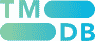](https://developers.themoviedb.org/3)